
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
data  = pd.read_csv('./data/pokemon/pokemon.csv')
data

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [3]:
data.shape
data.info()
data.describe()
data.describe(include=["object"])
data[['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name', 'type1', 'type2', 'is_legendary']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

,abilities,capture_rate,classfication,japanese_name,name,type1,type2,is_legendary
0,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison,0
1,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison,0
2,"['Overgrow', 'Chlorophyll']",45,Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison,0
3,"['Blaze', 'Solar Power']",45,Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,NaN,0
4,"['Blaze', 'Solar Power']",45,Flame Pokémon,Lizardoリザード,Charmeleon,fire,NaN,0
...,...,...,...,...,...,...,...,...
796,['Beast Boost'],25,Launch Pokémon,Tekkaguyaテッカグヤ,Celesteela,steel,flying,1
797,['Beast Boost'],255,Drawn Sword Pokémon,Kamiturugiカミツルギ,Kartana,grass,steel,1
798,['Beast Boost'],15,Junkivore Pokémon,Akuzikingアクジキング,Guzzlord,dark,dragon,1
799,['Prism Armor'],3,Prism Pokémon,Necrozmaネクロズマ,Necrozma,psychic,NaN,1


In [4]:
data[data['capture_rate'] == '30 (Meteorite)255 (Core)']
data = data[data['capture_rate'] != '30 (Meteorite)255 (Core)']


In [5]:
data['capture_rate'] = pd.to_numeric(data['capture_rate'], errors='coerce')
data['capture_rate']

/tmp/ipykernel_11926/1241181371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['capture_rate'] = pd.to_numeric(data['capture_rate'], errors='coerce')


0       45
1       45
2       45
3       45
4       45
      ... 
796     25
797    255
798     15
799      3
800      3
Name: capture_rate, Length: 800, dtype: int64

In [6]:
data[data.duplicated()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


In [7]:
emptys = data.isnull().sum()
emptys[emptys != 0]

height_m            20
percentage_male     97
type2              384
weight_kg           20
dtype: int64

In [8]:
imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value = -1)
imp_0.fit(data[['height_m', 'weight_kg', 'percentage_male']])
data[['height_m', 'weight_kg', 'percentage_male']] = imp_0.transform(data[['height_m', 'weight_kg', 'percentage_male']])

emptys = data.isnull().sum()
emptys[emptys != 0]

/tmp/ipykernel_11926/3199026706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['height_m', 'weight_kg', 'percentage_male']] = imp_0.transform(data[['height_m', 'weight_kg', 'percentage_male']])


type2    384
dtype: int64

In [9]:
print(data)
data = data.drop(['name', 'japanese_name'], axis=1)


                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

In [10]:
data = pd.get_dummies(data, columns=['type1', 'type2', 'classfication', 'abilities'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 800
Columns: 1139 entries, against_bug to abilities_['Wonder Skin ', 'Magic Guard', 'Tinted Lens']
dtypes: float64(21), int64(14), uint8(1104)
memory usage: 1.1 MB


In [11]:
data_Y = data[['is_legendary']]
data_X = data.drop(['is_legendary'], axis=1)

In [12]:
X_scaled = StandardScaler().fit_transform(data_X)

pca = PCA(n_components=3)
pca_features = pca.fit_transform(data_X)
pca_features

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

pca_df['is_legendary'] = data_Y
pca_df

,PC1,PC2,PC3,is_legendary
0,4837.782555,-2150.194871,389.210911,0.0
1,4837.803081,-2149.287871,384.713034,0.0
2,4837.866689,-2146.524627,372.180636,0.0
3,4837.781335,-2150.258525,386.756631,0.0
4,4837.804640,-2149.231418,381.769837,0.0
...,...,...,...,...
795,195347.958385,20545.868267,-255.142542,1.0
796,195347.774208,20538.243698,-220.202425,1.0
797,195347.942402,20545.167210,-253.704995,1.0
798,195347.839262,20541.130243,-234.144068,1.0


In [13]:
pca.explained_variance_ratio_

array([9.98558643e-01, 1.43817391e-03, 1.99671195e-06])

Se ve como el PCA1 es más relevante que los demás, por lo que se podría reducir la dimensionalidad a 1.

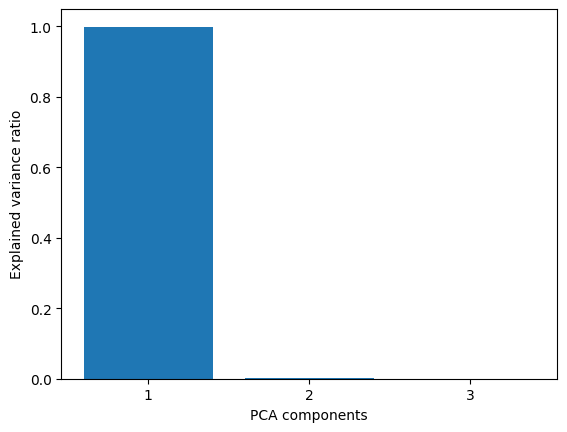

In [14]:
#Bar plot of PCA components
plt.bar(x=range(1,4), height=pca.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('PCA components')
plt.xticks(range(1,4))
plt.show()




Ahora debe analizarse la correlación entre las variables, para ver cuales son más relevantes y si hay alguna que se pueda eliminar.

In [15]:
# Coeficientes de correlación de los componentes principales
loadings = pca.components_
 
# Número de características antes de la PCA
n_features = pca.n_features_
 
# Nombres de las características antes de la PCA
feature_names = data_X.columns
# Nombres de los componentes principales
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Asociar los nombres de los componentes principales con los coeficientes de correlación
pc_loadings = dict(zip(pc_list, loadings))

# Matriz de coeficientes de correlación entre los nombres de las características y los componentes principales
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
# loadings_df = loadings_df.set_index('feature_names')

# Ordenar por valor absoluto del primer componente principal y mostrar las 10 primeras filas
loadings_df.sort_values(by=['PC1'], ascending=False).head(10)

,PC1,PC2,PC3,feature_names
24,0.999883,-0.015322,0.000023,experience_growth
19,0.015319,0.999785,0.007418,base_egg_steps
21,0.000191,0.008464,-0.032680,base_total
32,0.000167,0.006684,-0.032816,weight_kg
28,0.000122,0.006812,-0.998551,pokedex_number
18,0.000048,0.001374,-0.012427,attack
29,0.000041,0.001888,-0.005809,sp_attack
26,0.000036,0.001315,-0.006120,hp
31,0.000026,0.001207,0.006564,speed
23,0.000025,0.001182,-0.009326,defense


Se puede observar que las variables 1 y 2 son las más relevantes, por lo que se podría reducir la dimensionalidad a 2.

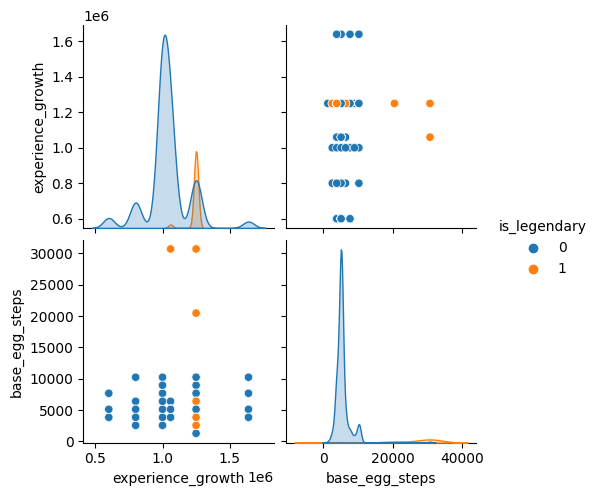

In [16]:
# reduced_data = data[['experience_growth','base_egg_steps', 'is_legendary']]
reduced_data = data[['experience_growth','base_egg_steps', 'is_legendary']]

sns.pairplot(reduced_data, hue='is_legendary')

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [17]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score



lr = LogisticRegression(max_iter=1000)
lrcv = LogisticRegressionCV(max_iter=1000)
sgdc = SGDClassifier(max_iter=1000)

In [18]:
X_reduced = data_X[['experience_growth','base_egg_steps']]


In [19]:
# cv_lr_reduced = cross_validate(lr, X_reduced, data_Y.to_numpy().ravel(), cv=5, scoring=('f1', 'accuracy', 'precision': make_scorer(precision_score, zero_division=1), 'recall'), return_train_score=True)
scoring = {'f1': 'f1',
           'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, zero_division=1),
           'recall': 'recall'}

cv_lr_reduced = cross_validate(lr, X_reduced, data_Y.to_numpy().ravel(), cv=5, scoring=scoring, return_train_score=True)
cv_lrcv_reduced = cross_validate(lrcv, X_reduced, data_Y.to_numpy().ravel(), cv=5, scoring=scoring, return_train_score=True)
cv_sgdc_reduced = cross_validate(sgdc, X_reduced, data_Y.to_numpy().ravel(), cv=5, scoring=scoring, return_train_score=True)


In [20]:
print(cv_lr_reduced['test_f1'], cv_lr_reduced['test_f1'].mean(), cv_lr_reduced['test_f1'].std())
print(cv_lrcv_reduced['test_f1'], cv_lrcv_reduced['test_f1'].mean(), cv_lrcv_reduced['test_f1'].std())
print(cv_sgdc_reduced['test_f1'], cv_sgdc_reduced['test_f1'].mean(), cv_sgdc_reduced['test_f1'].std())

[0.52631579 0.96296296 0.96296296 0.83333333 0.89655172] 0.836425354574175 0.16236761743192224
[0.52631579 0.96296296 0.96296296 0.83333333 0.89655172] 0.836425354574175 0.16236761743192224
[0.         0.83333333 0.16091954 0.83333333 0.89655172] 0.5448275862068965 0.38325017623250135


In [21]:
print(cv_lr_reduced['test_accuracy'], cv_lr_reduced['test_accuracy'].mean(), cv_lr_reduced['test_accuracy'].std())
print(cv_lrcv_reduced['test_accuracy'], cv_lrcv_reduced['test_accuracy'].mean(), cv_lrcv_reduced['test_accuracy'].std())
print(cv_sgdc_reduced['test_accuracy'], cv_sgdc_reduced['test_accuracy'].mean(), cv_sgdc_reduced['test_accuracy'].std())

[0.94375 0.99375 0.99375 0.975   0.98125] 0.9775 0.01837117307087385
[0.94375 0.99375 0.99375 0.975   0.98125] 0.9775 0.01837117307087385
[0.9125  0.975   0.0875  0.975   0.98125] 0.7862499999999999 0.35027667635741894


In [22]:

print(cv_lr_reduced['test_precision'], cv_lr_reduced['test_precision'].mean(), cv_lr_reduced['test_precision'].std())
print(cv_lrcv_reduced['test_precision'], cv_lrcv_reduced['test_precision'].mean(), cv_lrcv_reduced['test_precision'].std())
print(cv_sgdc_reduced['test_precision'], cv_sgdc_reduced['test_precision'].mean(), cv_sgdc_reduced['test_precision'].std())

[1.         1.         1.         1.         0.86666667] 0.9733333333333334 0.05333333333333332
[1.         1.         1.         1.         0.86666667] 0.9733333333333334 0.05333333333333332
[1.         1.         0.0875     1.         0.86666667] 0.7908333333333333 0.3554379145661181


In [23]:
print(cv_lr_reduced['test_recall'], cv_lr_reduced['test_recall'].mean(), cv_lr_reduced['test_recall'].std())
print(cv_lrcv_reduced['test_recall'], cv_lrcv_reduced['test_recall'].mean(), cv_lrcv_reduced['test_recall'].std())
print(cv_sgdc_reduced['test_recall'], cv_sgdc_reduced['test_recall'].mean(), cv_sgdc_reduced['test_recall'].std())

[0.35714286 0.92857143 0.92857143 0.71428571 0.92857143] 0.7714285714285716 0.22314999074019012
[0.35714286 0.92857143 0.92857143 0.71428571 0.92857143] 0.7714285714285716 0.22314999074019012
[0.         0.71428571 1.         0.71428571 0.92857143] 0.6714285714285715 0.35456210417116735


In [24]:
lr.fit(X_reduced, data_Y.to_numpy().ravel())

Celesteela = X_reduced.iloc[[796]]
bulbasur = X_reduced.iloc[[0]]

print(lr.predict(Celesteela))
print(lr.predict(bulbasur))



[1]
[0]


Finalmente, se prueba el fit del modelo LogisticRegression contra todos los datos, y se calcula el accuracy.

In [26]:
# Ajustar el modelo a los datos reducidos
lr.fit(X_reduced, data_Y.to_numpy().ravel())

# Realizar predicciones en todo el conjunto de datos reducido
y_pred = lr.predict(X_reduced)

# Crear un DataFrame con las predicciones y los valores reales
results = pd.DataFrame({'Actual': data_Y.to_numpy().ravel(), 'Predicted': y_pred})

# Calcular el porcentaje de aciertos
accuracy = (results['Actual'] == results['Predicted']).sum() / len(results) * 100
print('Accuracy:', round(accuracy, 2), '%')



Accuracy: 96.88 %
